In [877]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from math import sqrt

from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
#from keras.datasets import mnist

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler



In [878]:
currency_list = [#'USDCHF10080',
                 #'GBPUSD10080', 'EURUSD10080', 
    #'USDJPY10080', 
    #'USDCAD10080', 
    #'AUDUSD10080', 
    #'NZDUSD10080',
                 #'GBPCHF10080',
    #'EURCHF10080', 
    #'CHFJPY10080', 
    #'CADCHF10080',
    #'AUDCHF10080', 
    #'NZDCHF10080', 
    'EURGBP10080',
             #   'GBPCAD10080',
     #'GBPAUD10080', 
    #'EURJPY10080',
    #'EURCAD10080',
    #'EURAUD10080',
    #'EURNZD10080',
    #'CADJPY10080', 
    #'AUDJPY10080',
    #'NZDJPY10080',
    #'AUDCAD10080', 
    #'NZDCAD10080', 
                #'AUDNZD10080'
                ]



# for q in currency_list:
    
#     errors = []
    
#     for x in range(5):

#         currency = q.replace('10080','')

#         data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
#         #data = data.head(695)


#         X = data.drop(columns=['Unnamed: 0', 
#                                'date_start',  'nextweek_class',


#                               ])



#         y = data['nextweek_class']

#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )



#         lnr= LinearRegression()
#         lnr.fit(X_train, y_train)
#         y_predict = lnr.predict(X_test)
        
        
#         error = sqrt(mean_squared_error(y_test, y_pred))
#         errors.append(error)
       
        
#     average_error = sum(errors)/len(errors)
       
#     print(q + " Linear regression Average " + str(average_error))
    
    
   


(1414, 1, 6) (1414,)
Epoch 1/5
38/38 [==============================] - 7s 13ms/step - loss: 151.6380
Epoch 2/5
38/38 [==============================] - 1s 15ms/step - loss: 151.6371
Epoch 3/5
38/38 [==============================] - 0s 12ms/step - loss: 151.6330
Epoch 4/5
38/38 [==============================] - 0s 12ms/step - loss: 151.6332
Epoch 5/5
7/7 [==============================] - 1s 5ms/step - loss: 158.3248
------------------------------------------------------------------------------------ 0
(1414, 1, 6) (1414,)
Epoch 1/5
38/38 [==============================] - 4s 10ms/step - loss: 153.1636
Epoch 2/5
38/38 [==============================] - 0s 10ms/step - loss: 153.1600
Epoch 3/5
38/38 [==============================] - 0s 12ms/step - loss: 153.1595
Epoch 4/5
38/38 [==============================] - 0s 10ms/step - loss: 153.1632
Epoch 5/5
7/7 [==============================] - 1s 6ms/step - loss: 149.7332
-------------------------------------------------------------------

38/38 [==============================] - 3s 10ms/step - loss: 156.9535
Epoch 2/5
38/38 [==============================] - 0s 10ms/step - loss: 156.9502
Epoch 3/5
38/38 [==============================] - 0s 10ms/step - loss: 156.9538
Epoch 4/5
38/38 [==============================] - 0s 10ms/step - loss: 156.9493
Epoch 5/5
7/7 [==============================] - 1s 5ms/step - loss: 128.3808
------------------------------------------------------------------------------------ 14
(1414, 1, 6) (1414,)
Epoch 1/5
38/38 [==============================] - 3s 9ms/step - loss: 153.6027
Epoch 2/5
38/38 [==============================] - 0s 9ms/step - loss: 153.6001
Epoch 3/5
38/38 [==============================] - 0s 9ms/step - loss: 153.6046
Epoch 4/5
38/38 [==============================] - 0s 9ms/step - loss: 153.5872
Epoch 5/5
7/7 [==============================] - 1s 5ms/step - loss: 147.2919
------------------------------------------------------------------------------------ 15
(1414, 1, 6) 

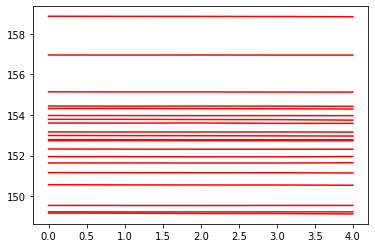

In [879]:
for q in currency_list:
    
    
    
    sequences = [1]
    
    all_sequence_result = []
        
    for m in sequences:
    
        errors = []
        for x in range(20):
        
            currency = q.replace('10080','')

            data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
            #data = data.head(695)


            X = data.drop(columns=['Unnamed: 0', 
                                   'date_start',  'nextweek_class',


                                  ])



            y = data['nextweek_class']


#             X_scaler = RobustScaler(quantile_range=(10.0, 90.0),)
            
#             X_scaler.fit(X)
           
#             X = X_scaler.transform(X)
           
#             X = pd.DataFrame(X, columns = [q+"_class", q+'_volume'])
            

            #print(X)


            # after scaling the df, resulted in "scaled_dataset"





            result = []
            # for loop will walk for each of the 1500 rows
            for i in range(0,len(X)):
                # every group must have the same length, so if current loop position i + number 
                # of sequences is higher than df length, breaks
                if i+m <= len(X):
                    # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
                    result.append(X[i:i+m].values)
            # Converting to array + keras takes float32 better than 64
            train_x = np.array(result)
            #train_x  = train_x.astype('float32')
            # making the y into same length as X
            train_y = np.array(y.head(len(train_x)).values)

            print(train_x.shape, train_y.shape)
            #print(train_x[len(train_x)-10])
            #print(train_y[len(train_x)-10])
            
            
           

            X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.15 )
                               
            

            #X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.15 )

            

            #Initializing the classifier Network
            classifier = Sequential()

            #Adding the input LSTM network layer
            #classifier.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
            classifier.add(LSTM(100, input_shape=(train_x.shape[1:]), return_sequences=True))
           
           
            classifier.add(LSTM(100,  return_sequences=True), )
            #classifier.add(LSTM(100,  return_sequences=True))
            

            #classifier.add(Dense(units = 1))
            classifier.add(LSTM(100,  return_sequences=False))
            #classifier.add(Dropout(0.2))
            #Adding a second LSTM network layer

            #classifier.add(LSTM(128))
            #Adding a dense hidden layer
            #classifier.add(Dense(64, activation='relu'))
            #classifier.add(Dropout(0.2))

            #Adding the output layer
            #classifier.add(Dense(35, activation='softmax'))

            #Compiling the network
            classifier.compile( loss='mean_squared_error',
                            optimizer=Adam(learning_rate=0.001, decay=1e-6),
                             )

            #print(classifier.summary())

            #Fitting the data to the model
            history = classifier.fit(X_train,
                        y_train,
                        epochs=5,
                        #validation_data=(X_val, y_val)
                                    )        

            val_loss  = classifier.evaluate(X_test, y_test)
            error = sqrt(val_loss)
            errors.append(error)
            plt.plot(history.history['loss'],'red')
            #plt.plot(history.history['val_loss'], 'blue')
            print('------------------------------------------------------------------------------------',x)
        average_error = sum(errors)/len(errors)
        print(errors)
        print(q , "------------------------ RNN " , average_error)
        all_sequence_result.append(str(m)+" sequence" )
        all_sequence_result.append(average_error)


In [880]:
print(all_sequence_result)   


['1 sequence', 12.282867917124213]
